<a href="https://colab.research.google.com/github/PriscilaRojasS/Trabajo_Algebra1/blob/main/Trabajo_algebra_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import files

# Cargar archivo ZIP desde tu computadora
uploaded = files.upload()

# Verificar el archivo subido
file_name = list(uploaded.keys())[0]  # Obtén el nombre del archivo cargado
print(f"Archivo subido: {file_name}")


Saving dataset.zip to dataset.zip
Archivo subido: dataset.zip


In [8]:
import zipfile
import os

# Ruta del archivo ZIP subido
zip_file_path = file_name  # Ya tenemos el nombre del archivo subido

# Ruta donde se extraerán los archivos
extracted_dir = '/content/dataset/'

# Descomprimir el archivo ZIP
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)

# Verificar los archivos extraídos
extracted_files = os.listdir(extracted_dir)
print("Archivos extraídos:", extracted_files)


Archivos extraídos: ['ml-100k']


In [9]:
import os

# Ruta de la carpeta extraída
extracted_dir = '/content/dataset/ml-100k/'

# Verificar los archivos extraídos
extracted_files = os.listdir(extracted_dir)
print("Archivos extraídos:", extracted_files)


Archivos extraídos: ['ua.test', 'ua.base', 'ub.base', 'u.item', 'u4.base', 'u.occupation', 'ub.test', 'u1.test', 'u2.base', 'u3.test', 'mku.sh', 'allbut.pl', 'u1.base', 'u4.test', 'u2.test', 'README', 'u.genre', 'u.info', 'u3.base', 'u.user', 'u5.test', 'u.data', 'u5.base']


In [10]:
import pandas as pd

# Ruta al archivo 'u.data' dentro de la carpeta extraída
file_path = os.path.join(extracted_dir, 'u.data')

# Leer el archivo CSV (u.data) que contiene las calificaciones
data = pd.read_csv(file_path, sep='\t', header=None, names=['user_id', 'movie_id', 'rating', 'timestamp'])

# Mostrar las primeras filas de los datos
data.head()


,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [11]:
# Cargar archivo u.data (calificaciones)
file_u_data = os.path.join(extracted_dir, 'u.data')
data = pd.read_csv(file_u_data, sep='\t', header=None, names=['user_id', 'movie_id', 'rating', 'timestamp'])

# Cargar archivo u.item (información de las películas)
file_u_item = os.path.join(extracted_dir, 'u.item')
movies = pd.read_csv(file_u_item, sep='|', header=None, encoding='latin-1', names=['movie_id', 'movie_title', 'release_date', 'video_release_date', 'imdb_url'] + [f'genre_{i}' for i in range(19)])

# Cargar archivo u.user (información de los usuarios)
file_u_user = os.path.join(extracted_dir, 'u.user')
users = pd.read_csv(file_u_user, sep='|', header=None, names=['user_id', 'age', 'gender', 'occupation', 'zip_code'])

# Mostrar las primeras filas para verificar
print(data.head())
print(movies.head())
print(users.head())


   user_id  movie_id  rating  timestamp
0      196       242       3  881250949
1      186       302       3  891717742
2       22       377       1  878887116
3      244        51       2  880606923
4      166       346       1  886397596
   movie_id        movie_title release_date  video_release_date  \
0         1   Toy Story (1995)  01-Jan-1995                 NaN   
1         2   GoldenEye (1995)  01-Jan-1995                 NaN   
2         3  Four Rooms (1995)  01-Jan-1995                 NaN   
3         4  Get Shorty (1995)  01-Jan-1995                 NaN   
4         5     Copycat (1995)  01-Jan-1995                 NaN   

                                            imdb_url  genre_0  genre_1  \
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...        0        0   
1  http://us.imdb.com/M/title-exact?GoldenEye%20(...        0        1   
2  http://us.imdb.com/M/title-exact?Four%20Rooms%...        0        0   
3  http://us.imdb.com/M/title-exact?Get%20Shorty%...        0

Crear la matris de interacciones (usuarios vs. peliculas)

In [12]:
# Crear la matriz de interacciones usuario-producto (usuarios vs películas)
matrix = data.pivot_table(index='user_id', columns='movie_id', values='rating')

# Verificar las primeras filas de la matriz
matrix.head()


movie_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Imputación de valores NaN en la matriz de interacciones

---
Es decir se crea una nueva matriz imputada, donde los valores faltantes sean reemplazados por la media de las calificaciones de cada usuario.
Involucra el tema de Proyección


In [13]:
# Paso 3: Imputar los valores faltantes en la matriz
# Lo que vamos a hacer es reemplazar los valores NaN con la media de las calificaciones de cada usuario.

# matrix_imputed es la nueva matriz donde se reemplazarán los NaN
# Usamos el método apply() para recorrer cada fila (usuario)
# y rellenar los valores NaN con la media de las calificaciones de ese usuario.

matrix_imputed = matrix.apply(lambda row: row.fillna(row.mean()), axis=1)

# Mostrar las primeras filas de la matriz imputada para verificar el resultado
matrix_imputed.head()


movie_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.000000,3.000000,4.000000,3.000000,3.000000,5.000000,4.000000,1.000000,5.000000,3.000000,...,3.610294,3.610294,3.610294,3.610294,3.610294,3.610294,3.610294,3.610294,3.610294,3.610294
2,4.000000,3.709677,3.709677,3.709677,3.709677,3.709677,3.709677,3.709677,3.709677,2.000000,...,3.709677,3.709677,3.709677,3.709677,3.709677,3.709677,3.709677,3.709677,3.709677,3.709677
3,2.796296,2.796296,2.796296,2.796296,2.796296,2.796296,2.796296,2.796296,2.796296,2.796296,...,2.796296,2.796296,2.796296,2.796296,2.796296,2.796296,2.796296,2.796296,2.796296,2.796296
4,4.333333,4.333333,4.333333,4.333333,4.333333,4.333333,4.333333,4.333333,4.333333,4.333333,...,4.333333,4.333333,4.333333,4.333333,4.333333,4.333333,4.333333,4.333333,4.333333,4.333333
5,4.000000,3.000000,2.874286,2.874286,2.874286,2.874286,2.874286,2.874286,2.874286,2.874286,...,2.874286,2.874286,2.874286,2.874286,2.874286,2.874286,2.874286,2.874286,2.874286,2.874286


Aplicación del SVD

In [14]:
import numpy as np
import pandas as pd
from sklearn.decomposition import TruncatedSVD

# Supongamos que 'matrix' es la matriz de interacciones original, con NaN
# Aquí estamos trabajando con la matriz imputada (con valores faltantes reemplazados por la media de cada usuario)

# Matrix de interacciones imputada previamente
# (En este caso, asegúrate de tener la 'matrix_imputed' de antes como hemos hecho)

# Mostrar la matriz imputada para asegurarnos que está bien
print("Matriz imputada:")
print(matrix_imputed.head())

# Paso 2: Aplicar SVD (Descomposición en Valores Singulares)
svd = TruncatedSVD(n_components=2, random_state=42)  # Elegimos 2 componentes para la demostración
U = svd.fit_transform(matrix_imputed)  # Matriz U (vectores latentes de usuarios)
Sigma = np.diag(svd.singular_values_)  # Matriz Sigma (valores singulares)
Vt = svd.components_  # Matriz V^T (vectores latentes de películas)

# Paso 3: Ver todas las matrices obtenidas
print("\nMatriz U (vectores latentes de usuarios):")
print(U)

print("\nMatriz Sigma (valores singulares):")
print(Sigma)

print("\nMatriz V^T (vectores latentes de películas):")
print(Vt)

# Paso 4: Reconstrucción de la matriz de interacciones
matrix_reconstructed = np.dot(U, np.dot(Sigma, Vt))

print("\nMatriz reconstruida (aproximación de la matriz original):")
print(pd.DataFrame(matrix_reconstructed, columns=matrix_imputed.columns))

# Paso 5: Valores singulares
print("\nValores singulares:")
print(svd.singular_values_)

# Paso 6: Realizar una predicción sobre una calificación faltante
# Para hacer una predicción, seleccionamos el valor de usuario 4 y película 1 (índices 3 y 0 en la matriz)
predicted_rating = np.dot(U[3, :], np.dot(Sigma, Vt[:, 0]))

print(f"\nPredicción de la calificación del usuario 4 para la película 1: {predicted_rating}")


Matriz imputada:
movie_id      1         2         3         4         5         6     \
user_id                                                                
1         5.000000  3.000000  4.000000  3.000000  3.000000  5.000000   
2         4.000000  3.709677  3.709677  3.709677  3.709677  3.709677   
3         2.796296  2.796296  2.796296  2.796296  2.796296  2.796296   
4         4.333333  4.333333  4.333333  4.333333  4.333333  4.333333   
5         4.000000  3.000000  2.874286  2.874286  2.874286  2.874286   

movie_id      7         8         9         10    ...      1673      1674  \
user_id                                           ...                       
1         4.000000  1.000000  5.000000  3.000000  ...  3.610294  3.610294   
2         3.709677  3.709677  3.709677  2.000000  ...  3.709677  3.709677   
3         2.796296  2.796296  2.796296  2.796296  ...  2.796296  2.796296   
4         4.333333  4.333333  4.333333  4.333333  ...  4.333333  4.333333   
5         2.8742

PCA, elección de componentes

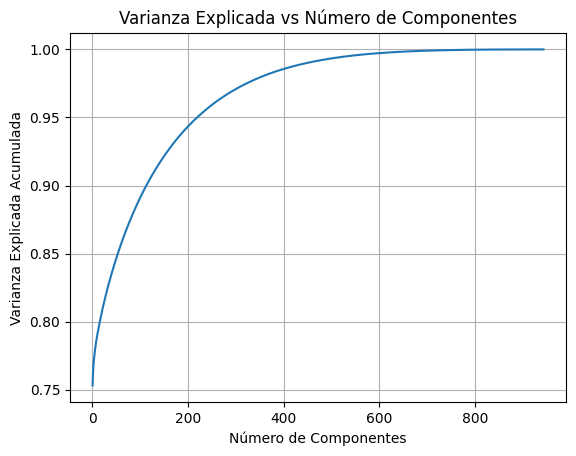


Varianza explicada acumulada por componente:
[0.75313931 0.76287721 0.76895397 0.77251255 0.77581126 0.77884647
 0.78159538 0.7841412  0.78641939 0.78850579 0.79055193 0.79243721
 0.79430774 0.79614373 0.7979593  0.79975146 0.80148533 0.80319637
 0.80486108 0.80652386 0.80811062 0.80966681 0.81120421 0.81272812
 0.81421645 0.81568559 0.81714972 0.81859004 0.82000153 0.82140975
 0.82277767 0.82412674 0.82546452 0.82678437 0.82808243 0.82937306
 0.83064615 0.83189107 0.83312939 0.83435307 0.83557169 0.83677525
 0.83796591 0.83914378 0.84031233 0.84147401 0.84261825 0.84375276
 0.84486958 0.84597609 0.84707064 0.84815132 0.84922755 0.85029235
 0.85134801 0.85240039 0.85345037 0.85448932 0.8555173  0.85653437
 0.85754275 0.85853458 0.85951676 0.86049611 0.86146168 0.86242194
 0.86337276 0.86432033 0.86524954 0.86617694 0.86710189 0.86800445
 0.86889531 0.86978113 0.8706637  0.87154288 0.87241465 0.87328174
 0.87414096 0.87499259 0.87584087 0.87668088 0.87751497 0.87834647
 0.87916546 0.87

In [15]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Aplicar PCA a la matriz imputada
pca = PCA()
pca.fit(matrix_imputed)

# Gráfico de la varianza explicada acumulada
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Graficar la varianza explicada acumulada
plt.plot(range(1, len(explained_variance)+1), explained_variance)
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada vs Número de Componentes')
plt.grid(True)
plt.show()

# Mostrar el valor de la varianza explicada acumulada para cada número de componentes
print("\nVarianza explicada acumulada por componente:")
print(explained_variance)



Codigo para aplicar SVD con el número de componentes elegido

In [16]:
# Elegimos el número de componentes basado en el análisis de PCA
n_components = 300  # Elegido en base a la varianza explicada acumulada

# Aplicamos SVD con 300 componentes latentes
svd = TruncatedSVD(n_components=n_components, random_state=42)
U = svd.fit_transform(matrix_imputed)  # Vectores latentes de usuarios
Sigma = np.diag(svd.singular_values_)  # Matriz Sigma (valores singulares)
Vt = svd.components_  # Vectores latentes de películas

# Mostrar las matrices obtenidas
print("\nMatriz U (vectores latentes de usuarios):")
print(U)

print("\nMatriz Sigma (valores singulares):")
print(Sigma)

print("\nMatriz V^T (vectores latentes de películas):")
print(Vt)

# Reconstrucción de la matriz de interacciones
matrix_reconstructed = np.dot(U, np.dot(Sigma, Vt))

# Mostrar la matriz reconstruida
print("\nMatriz reconstruida (aproximación de la matriz original):")
print(pd.DataFrame(matrix_reconstructed, columns=matrix_imputed.columns))



Matriz U (vectores latentes de usuarios):
[[ 1.48141736e+02  6.26851177e+00 -8.50947967e-01 ...  9.45266792e-02
  -5.55835966e-02  1.95081518e-01]
 [ 1.52153557e+02 -6.64817394e-01 -5.51993927e-01 ... -1.39617293e-01
   7.10156541e-02  2.82342573e-01]
 [ 1.14680261e+02 -7.30672358e-01 -1.02626720e-01 ...  2.70376142e-01
   3.27430126e-02  2.52907000e-01]
 ...
 [ 1.65907656e+02 -1.39470368e+00  1.15598328e-02 ...  1.78089209e-01
   1.37951981e-01  6.97881733e-02]
 [ 1.74950709e+02 -9.33177740e-01  5.84372204e-01 ... -5.16282891e-01
   3.05055154e-01 -1.09605043e-01]
 [ 1.39918420e+02  3.20087763e+00  1.40859686e+00 ...  5.48218415e-01
   9.02935220e-03  1.14396355e-01]]

Matriz Sigma (valores singulares):
[[4553.93679047    0.            0.         ...    0.
     0.            0.        ]
 [   0.           65.84787761    0.         ...    0.
     0.            0.        ]
 [   0.            0.           50.46197457 ...    0.
     0.            0.        ]
 ...
 [   0.            0.    